In [2]:
#!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

In [3]:
import requests

url = "https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=1"
response = requests.get(url)
with open("dataset.zip", "wb") as f:
    f.write(response.content)


In [4]:
#!unzip dataset.zip?dl=0

In [5]:
import zipfile
import os

zip_file = "dataset.zip"
extract_folder = "dataset"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
extracted_files = os.listdir(extract_folder)
print("Files extracted:", extracted_files)


Files extracted: ['test', 'train']


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
#from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [7]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [8]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [14]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "C:\\Users\\ASUS\Desktop\\Emotion-detection-main\\dataset",
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )
#train_data = train_datagen.flow_from_directory(directory="C:\\Users\ASUS\\Desktop\\Emotion-detection-main\\train",
 #                                              target_size=(224,224), 
  #                                             batch_size=32,
   #                               )
train_data.class_indices

Found 35887 images belonging to 2 classes.


{'test': 0, 'train': 1}

In [16]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "C:\\Users\\ASUS\Desktop\\Emotion-detection-main\\dataset", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 35887 images belonging to 2 classes.


# visualizaing the data that is fed to train data gen

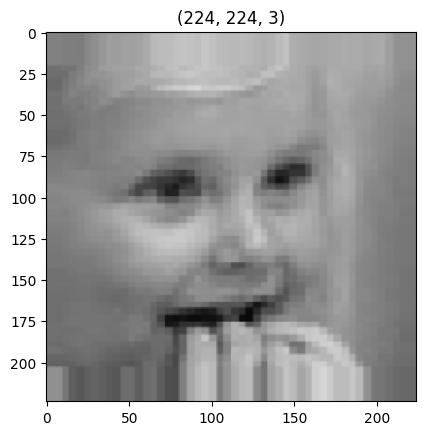

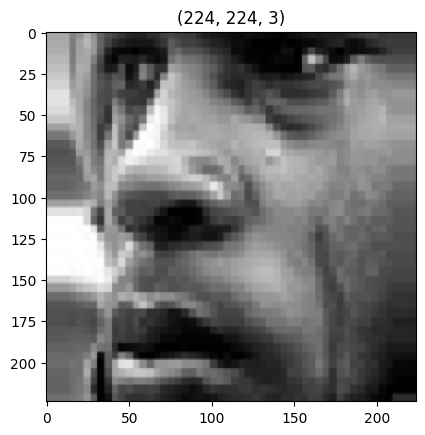

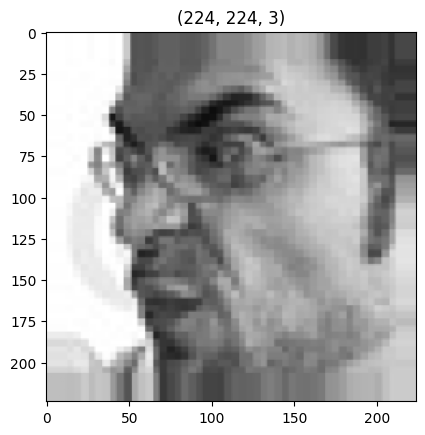

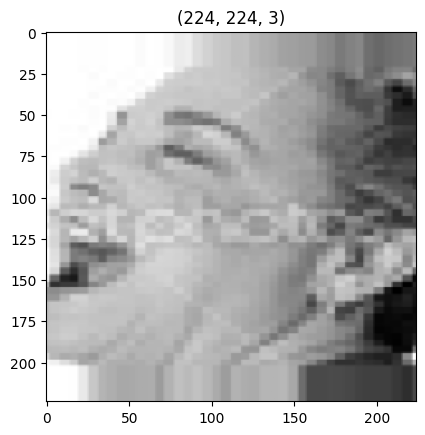

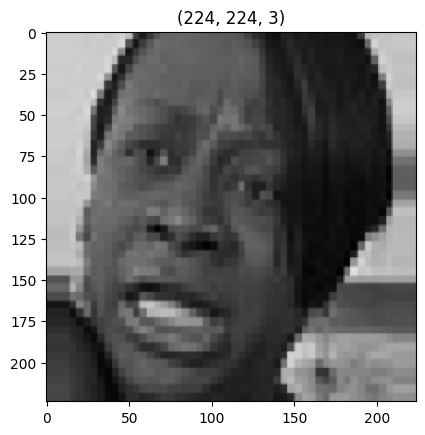

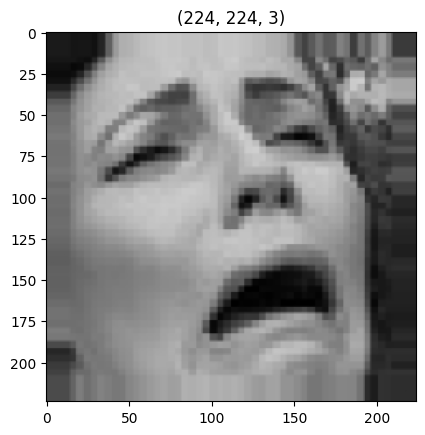

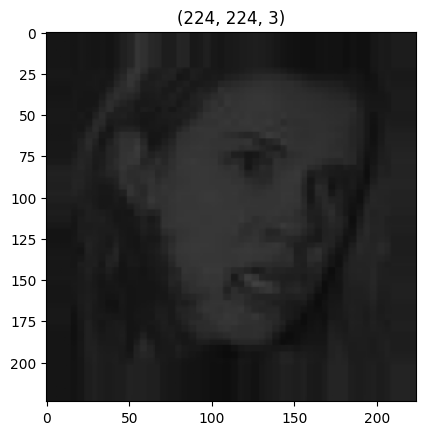

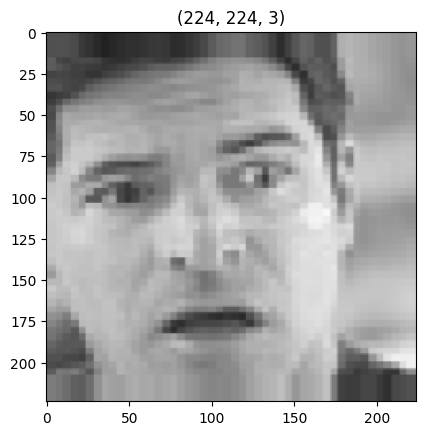

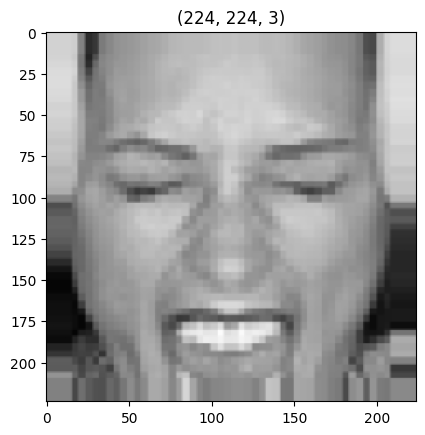

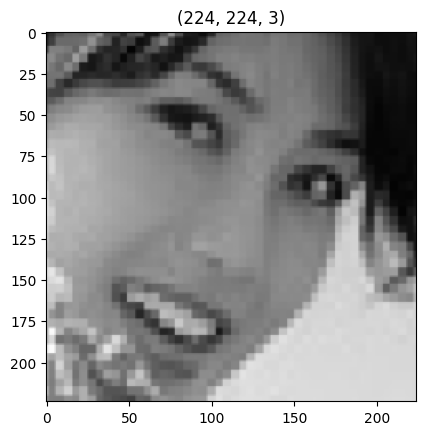

In [17]:
# to visualize the images in the traing data denerator 

#t_img , label = train_data.next()
# Get the next batch of data from the generator
t_img, label = next(train_data)


#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [18]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
#mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')
#mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', save_format='h5')
#mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')




# puting call back in a list 
call_back = [es, mc]

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing your training and validation data
train_dir = 'C:\\Users\ASUS\\Desktop\\Emotion-detection-main\\dataset\\train'
val_dir = 'C:\\Users\ASUS\\Desktop\\Emotion-detection-main\\dataset\\test'

# Define data generators with augmentation for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Define your model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')
#mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Train the model
hist = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=30,
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=[es, mc]
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


C:\Users\ASUS\Desktop\fuck\my_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30


C:\Users\ASUS\Desktop\fuck\my_venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2516 - loss: 1.8512
Epoch 1: val_accuracy improved from -inf to 0.27473, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 1520s 2s/step - accuracy: 0.2516 - loss: 1.8512 - val_accuracy: 0.2747 - val_loss: 1.7458
Epoch 2/30

Epoch 2: val_accuracy did not improve from 0.27473
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2679 - loss: 1.7587
Epoch 3: val_accuracy improved from 0.27473 to 0.31234, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 988s 1s/step - accuracy: 0.2679 - loss: 1.7587 - val_accuracy: 0.3123 - val_loss: 1.6920
Epoch 4/30

Epoch 4: val_accuracy did not improve from 0.31234
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2850 - loss: 1.7339
Epoch 5: val_accuracy improved from 0.31234 to 0.34090, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 981s 1s/step - accuracy: 0.2850 - loss: 1.7339 - val_accuracy: 0.3409 - val_loss: 1.6638
Epoch 6/30

Epoch 6: val_accuracy did not improve from 0.34090
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 79us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30
898/898 ━━━━━━━━━━━━━━

In [22]:
# Loading the best fit model

from tensorflow.keras.models import load_model
model = load_model("C:\\Users\ASUS\\Desktop\\Emotion-detection-main\\best_model.keras")




In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Load the pre-trained model
model = load_model("C:\\Users\\ASUS\\Desktop\\Emotion-detection-main\\best_model.keras")

# Print the summary of the loaded model to inspect its architecture
model.summary()

# Modify the model architecture if needed to match the input shape
# For example, if the model expects a different input shape than (48, 48, 1),
# you may need to add or remove layers to match the input shape.

# Define a new input layer with the desired input shape
new_input = Input(shape=(48, 48, 1))

# Retrieve the output of the last layer in the original model
# and set it as the input for the new model
x = model.layers[0](new_input)

# Reconstruct the rest of the model architecture
for layer in model.layers[1:]:
    x = layer(x)

# Create a new model with the modified architecture
new_model = Model(inputs=new_input, outputs=x)

# Compile the new model if needed
# new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use the new_model for prediction or further training
# predictions = new_model.predict(input_data)





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,111,767 (217.86 MB)

 Trainable params: 19,037,255 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,074,512 (145.24 MB)

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 48, 48, 1)

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Load the pre-trained model
model = load_model("C:\\Users\\ASUS\\Desktop\\Emotion-detection-main\\best_model.keras")

# Print the summary of the loaded model to inspect its architecture
model.summary()

# Define a new input layer with the desired input shape
new_input = Input(shape=(48, 48, 1))

# Define a Conv2D layer to convert grayscale to RGB (assuming grayscale)
conv2d_layer = Conv2D(3, (3, 3), activation='relu')(new_input)

# Store the output of the Conv2D layer
x = conv2d_layer

# Iterate through the layers of the original model
for layer in model.layers[1:]:
    # Apply each layer to the output of the previous layer
    x = layer(x)

# Create a new model with the modified architecture
new_model = Model(inputs=new_input, outputs=x)

# Print the summary of the new model
new_model.summary()






Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,111,767 (217.86 MB)

 Trainable params: 19,037,255 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,074,512 (145.24 MB)

ValueError: Input 0 of layer "conv2d_1" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 23, 23, 3)

In [71]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

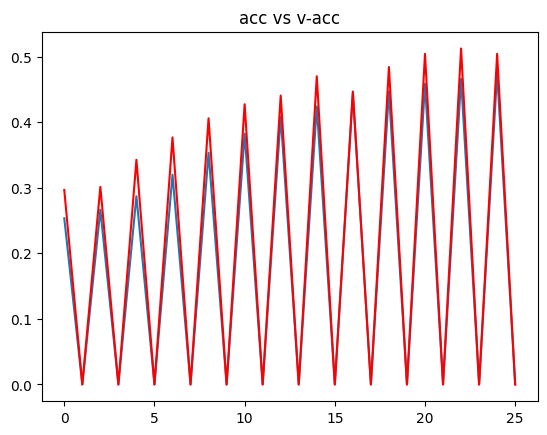

In [72]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

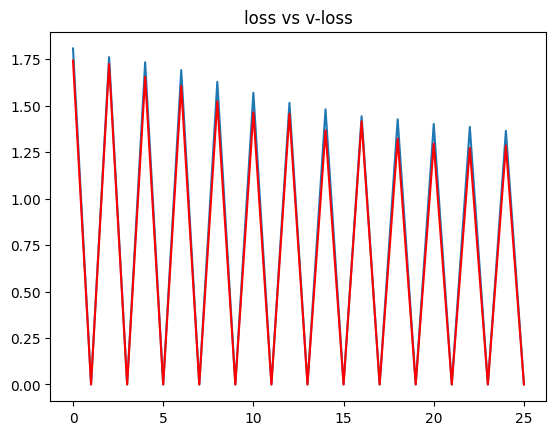

In [73]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [74]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [81]:
# path for the image to see if it predics correct class

"""path = "C:\\Users\ASUS\\Desktop\\Emotion-detection-main\\dataset\\test\\angry\\PrivateTest_731447.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()"""

'path = "C:\\Users\\ASUS\\Desktop\\Emotion-detection-main\\dataset\\test\\angry\\PrivateTest_731447.jpg"\nimg = load_img(path, target_size=(224,224) )\n\ni = img_to_array(img)/255\ninput_arr = np.array([i])\ninput_arr.shape\n\npred = np.argmax(model.predict(input_arr))\n\nprint(f" the image is of {op[pred]}")\n\n# to display the image  \nplt.imshow(input_arr[0])\nplt.title("input image")\nplt.show()'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
The image is of angry


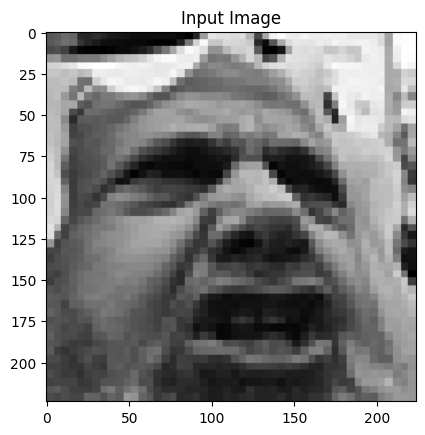

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')  # Assuming 7 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the path for the image
path = "C:\\Users\\ASUS\\Desktop\\Emotion-detection-main\\dataset\\test\\angry\\PrivateTest_731447.jpg"

# Load the image and resize it to match the input size of your model
img = load_img(path, target_size=(224, 224))

# Convert the image to an array and normalize it
i = img_to_array(img) / 255
input_arr = np.array([i])

# Make a prediction
pred = np.argmax(model.predict(input_arr))

# Print the predicted class
op = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
print(f"The image is of {op[pred]}")

# Display the image
plt.imshow(img)
plt.title("Input Image")
# plt.axis('off')  # Commented out to resolve the conflict
plt.show()
